Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from sklearn.model_selection import train_test_split
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist


Reading the data using the Pandas library

In [3]:
df = pd.read_csv('D:\VS Code Folders\CODSOFT\Movie Genre Classification\movies dataset\Genre Classification Dataset\\train_data.txt', sep=' ::: ', engine='python', header=None, names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
df.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [4]:
df.shape

(54214, 4)

In [5]:
df.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


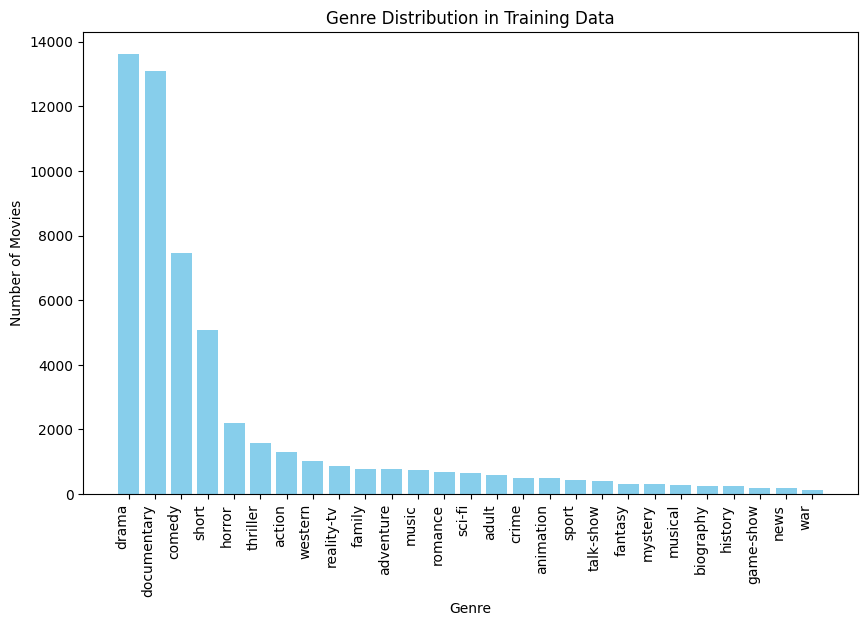

In [6]:
genre_counts = df['GENRE'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts, color='skyblue')
plt.title('Genre Distribution in Training Data')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90, ha='right')
plt.show()


In [7]:
df.head(20)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm s...
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all ...
7,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen w...
8,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss ..."
9,10,Spirits (2014/I),horror,Four high school students embark on a terrifyi...


In [8]:
df.isna().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [9]:
df['GENRE'].value_counts()

GENRE
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64

In [10]:
dummies = pd.get_dummies(df['GENRE'])
dummies

,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54209,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54210,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54211,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
54212,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
dummies.replace({True: 1, False: 0}, inplace= True)
dummies

,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54209,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54211,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
54212,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df['GENRE'].index

RangeIndex(start=0, stop=54214, step=1)

In [13]:
df_new = pd.concat([df, dummies], axis = 'columns')
df_new.drop('GENRE', axis = 'columns')
df_new

,ID,TITLE,GENRE,DESCRIPTION,action,adult,adventure,animation,biography,comedy,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y = df_new.drop(['GENRE', 'ID', 'TITLE', 'DESCRIPTION'], axis= 'columns')
y
genre_film = df_new[['family', 'fantasy','horror', 'action']].values
genre_film = y.values
genre_film
y = genre_film

In [76]:
X = df_new['DESCRIPTION']
X
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
print(type(X))
max_length = 0
description = None
for desc in X:
    if len(desc) > max_length:
        max_length = len(desc)
        description = desc
print(max_length)
print(len(y))
# print(description)
# print(X[5])
# print(y[5])

<class 'pandas.core.series.Series'>
10503
54214


In [49]:
def remove_stopwords(sentence):
    """
    Removes a list of stopwords
    
    Args:
        sentence (string): sentence to remove the stopwords from
    
    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    
    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence

sentences = []
for sentence in X:
    sentence = remove_stopwords(sentence)
    sentences.append(sentence)

print(len(sentences))

54214


In [50]:
type(sentences)
max_length = 0
description = None
for desc in sentences:
    if len(desc) > max_length:
        max_length = len(desc)
        description = desc
print(max_length)
# print(len(X))
# print(description)
# print(X[5])
# print(y[5])

8988


In [68]:
train_sentences, validation_sentences, train_labels, test_labels = train_test_split(sentences, y, test_size=0.1, random_state=True, shuffle= True)

In [69]:
print(train_sentences.shape)
print(train_labels.shape)
print(validation_sentences.shape)
print(test_labels.shape)

AttributeError: 'list' object has no attribute 'shape'

In [70]:
train_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [71]:
tokenizer = Tokenizer(num_words=25000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)
# tokenizer.fit_on_texts(X_test)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(validation_sentences)

padded_train_sentences = pad_sequences(train_sequences, padding = 'post', maxlen=1000)
padded_test_sentences = pad_sequences(test_sequences, padding = 'post', maxlen= 1000)

In [72]:
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

print(f"Vocabulary contains {VOCAB_SIZE} words\n")

Vocabulary contains 130623 words



In [73]:
type(padded_train_sentences)
print(padded_train_sentences[600].shape)

(1000,)


In [74]:
len(padded_train_sentences)
padded_train_sentences.shape

(48792, 1000)

In [75]:
len(padded_test_sentences)
padded_test_sentences.shape

(5422, 1000)

In [ ]:
# label_tokenizer = Tokenizer()

# # Fit the tokenizer on all the labels
# label_tokenizer.fit_on_texts(all_labels)

# # Convert labels to sequences
# label_seq = label_tokenizer.texts_to_sequences(split_labels)

# # Convert sequences to a numpy array. Don't forget to substact 1 from every entry in the array!
# label_seq_np = np.array(label_seq) - 1

In [63]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=100, input_length=1000),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(27, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [64]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
type(train_labels)
# y_train_one_hot = to_categorical(y_train, num_classes=27)
# y_test_one_hot = to_categorical(y_test, num_classes=27)

numpy.ndarray

In [66]:
class modelCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98 and logs.get('val_accuracy')>0.98):
      print("Expected accuracy have been achieved")
      self.model.stop_training = True
cb = modelCallbacks()

In [65]:
print(padded_train_sentences.shape)
print(train_labels.shape)
print(padded_test_sentences.shape)
print(test_labels.shape)

(48792, 1000)
(48792, 27)
(5422, 1000)
(5422, 27)


In [34]:
train_labels = to_categorical(train_labels, num_classes=27)
test_labels = to_categorical(test_labels, num_classes=27)

In [67]:
model_history = model.fit(
    padded_train_sentences,
    train_labels,
    epochs=100,
    validation_data=(padded_test_sentences, test_labels),
    verbose=2,
    batch_size=64
  )

Epoch 1/100


ValueError: in user code:

    File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1127, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py", line 5575, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 27) and (None, 1000, 27) are incompatible
